In [1]:
from fredapi import Fred
from datetime import datetime, date, timedelta
from dateutil.relativedelta import relativedelta
from functools import reduce
import pandas as pd
from pandas_datareader import data as pdr
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# Key: 02d60bd3174b5444867a02671ae80475
api_key = input("Please input your FRED API Key:\n").strip()
fred = Fred(api_key=api_key)

Please input your FRED API Key:
02d60bd3174b5444867a02671ae80475


In [3]:
def get_fred_series(name: str, date: str, label: str, to_frame: bool = True, pct_change: bool = False, periods: int = None, freq=None):
    """ Gets the FRED Series in Name, from Date, and inputs the data into a label 
        Assumes that data is in format of: "date", "value"
    """
    series = fred.get_series(name)
    if to_frame:
        series = series.to_frame()
    if pct_change:
        if not freq and not periods:
            series = series.pct_change()
        elif freq:
            series = series.pct_change(freq=freq)
        elif periods:
            series = series.pct_change(periods=periods)
    series = series.loc[date:]
    series[label] = series[0]
    return series.drop(columns = 0)

In [5]:
canada_gdp = get_fred_series('MKTGDPCAA646NWDB', '1970-01-01', 'GDP')
canada_gdp

,GDP
1970-01-01,8.789610e+10
1971-01-01,9.927196e+10
1972-01-01,1.130828e+11
1973-01-01,1.313219e+11
1974-01-01,1.604087e+11
1975-01-01,1.738340e+11
1976-01-01,2.065756e+11
1977-01-01,2.116122e+11
1978-01-01,2.186329e+11
1979-01-01,2.430721e+11


In [13]:
canada_recession = get_fred_series('CANRECDM', '1970-01-01', 'Recession')
canada_recession

,Recession
1970-01-01,1.0
1970-01-02,1.0
1970-01-03,1.0
1970-01-04,1.0
1970-01-05,1.0
...,...
2019-10-27,0.0
2019-10-28,0.0
2019-10-29,0.0
2019-10-30,0.0


In [15]:
canada_gdp_pctcg = get_fred_series('MKTGDPCAA646NWDB', '1970-01-01', 'GDP_%Change', pct_change=True)
canada_gdp_pctcg

,GDP_%Change
1970-01-01,0.110523
1971-01-01,0.129424
1972-01-01,0.139121
1973-01-01,0.161289
1974-01-01,0.221493
1975-01-01,0.083695
1976-01-01,0.188349
1977-01-01,0.024381
1978-01-01,0.033177
1979-01-01,0.111782


In [17]:
unemp = get_fred_series('LRUNTTTTCAM156S', '1970-01-01', 'Unemp')
unemp = unemp.iloc[::3, :]
unemp

,Unemp
1970-01-01,4.5
1970-04-01,5.4
1970-07-01,6.4
1970-10-01,6.0
1971-01-01,6.2
...,...
2019-10-01,5.6
2020-01-01,5.5
2020-04-01,13.0
2020-07-01,10.9


In [23]:
unemp_pct = get_fred_series('LRUNTTTTCAM156S', '1970-01-01', 'Unemp % Change', pct_change=True, periods=3).iloc[::3, :]
unemp_pct

,Unemp % Change
1970-01-01,-0.042553
1970-04-01,0.200000
1970-07-01,0.185185
1970-10-01,-0.062500
1971-01-01,0.033333
...,...
2019-10-01,-0.017544
2020-01-01,-0.017857
2020-04-01,1.363636
2020-07-01,-0.161538


In [26]:
nascom_pct = get_fred_series('NASDAQCOM', '1970-01-01', 'NASDAQCOM % Chg', pct_change=True, freq='Q')
nascom_pct = nascom_pct.loc[nascom_pct['NASDAQCOM % Chg'].notnull() == True]
nascom_pct.index = nascom_pct.index + pd.Timedelta('1 day')
nascom_pct

,NASDAQCOM % Chg
1971-04-01,0.059700
1971-07-01,0.017269
1971-10-01,0.011410
1972-01-01,0.046684
1972-04-01,0.122853
...,...
2019-10-01,-0.011349
2020-01-01,0.121668
2020-04-01,-0.141821
2020-07-01,0.306317


In [29]:
bond10y = get_fred_series('IRLTLT01CAM156N', '1970-01-01', '10Y-bonds')
bond10y

,10Y-bonds
1970-01-01,8.340000
1970-02-01,8.210000
1970-03-01,8.050000
1970-04-01,7.880000
1970-05-01,8.180000
...,...
2020-06-01,0.561364
2020-07-01,0.516364
2020-08-01,0.563500
2020-09-01,0.558000


In [31]:
canada_inflation = get_fred_series('FPCPITOTLZGCAN', '1970-01-01', 'Inflation')
canada_inflation

,Inflation
1970-01-01,3.346040
1971-01-01,2.704918
1972-01-01,4.988029
1973-01-01,7.487647
1974-01-01,10.997171
1975-01-01,10.672189
1976-01-01,7.541739
1977-01-01,7.976445
1978-01-01,8.973723
1979-01-01,9.144677


In [32]:
canada_employees = get_fred_series('LFEAMNTTCAM647S', '1970-01-01', 'ManufactureEmps')
canada_employees

,ManufactureEmps
1995-01-01,1894000.0
1995-02-01,1896800.0
1995-03-01,1895700.0
1995-04-01,1894100.0
1995-05-01,1920700.0
...,...
2020-06-01,1598000.0
2020-07-01,1627300.0
2020-08-01,1656700.0
2020-09-01,1724700.0


In [34]:
canada_employees_chg = get_fred_series('LFEAMNTTCAM647S', '1970-01-01', 'ManuEmps % Change', pct_change = True).dropna()
canada_employees_chg

,ManuEmps % Change
1995-02-01,0.001478
1995-03-01,-0.000580
1995-04-01,-0.000844
1995-05-01,0.014044
1995-06-01,-0.007653
...,...
2020-06-01,0.053603
2020-07-01,0.018335
2020-08-01,0.018067
2020-09-01,0.041045


In [39]:
loans_pctchg = get_fred_series('TOTCI', '1970-01-01', 'Commercial Loans % Change', pct_change = True, freq = 'M')
loans_pctchg = loans_pctchg.loc[loans_pctchg['Commercial Loans % Change'].notnull() == True]
loans_pctchg.index = loans_pctchg.index + pd.Timedelta('1 day')
loans_pctchg

,Commercial Loans % Change
1973-02-01,0.022449
1973-03-01,0.039754
1973-11-01,-0.001255
1974-08-01,0.013087
1975-05-01,-0.000478
...,...
2018-02-01,-0.002953
2018-03-01,0.006077
2018-11-01,0.006743
2019-08-01,0.001208


In [52]:
canada_medIncome = pd.read_csv('canadaMedIncome.csv').iloc[-1].to_frame().iloc[2:]
canada_medIncome.index = canada_inflation.loc['2000-01-01':'2018-01-01'].index
canada_medIncome['Median Income'] = canada_medIncome[10]
canada_medIncome = canada_medIncome.drop(columns = 10)
canada_medIncome

,Median Income
2000-01-01,"328,700"
2001-01-01,"348,100"
2002-01-01,"356,100"
2003-01-01,"363,300"
2004-01-01,"373,400"
2005-01-01,"385,500"
2006-01-01,"405,200"
2007-01-01,"422,390"
2008-01-01,"436,670"
2009-01-01,"432,680"


In [ ]:
canada_recession, canada_gdp, canada_gdp_pctcg, bond10y, canada_inflation, canada_employees, canada_employees_chg, loans_pctchg, canada_medIncome
unemp, unemp_pct, nascom_pct

In [53]:
outer = [canada_recession, canada_gdp, canada_gdp_pctcg, bond10y, canada_inflation, canada_employees, canada_employees_chg, loans_pctchg, canada_medIncome]
df_merged = reduce(lambda  left,right: pd.merge(left,right,left_index=True,right_index=True,
                                                how='outer'), outer)

In [54]:
inner = [df_merged, unemp, unemp_pct, nascom_pct]
df_merged = reduce(lambda  left,right: pd.merge(left,right,left_index=True,right_index=True,
                                                how='inner'), inner)
df_merged

,Recession,GDP,GDP_%Change,10Y-bonds,Inflation,ManufactureEmps,ManuEmps % Change,Commercial Loans % Change,Median Income,Unemp,Unemp % Change,NASDAQCOM % Chg
1971-04-01,0.0,NaN,NaN,6.830000,NaN,NaN,NaN,NaN,NaN,6.6,0.064516,0.059700
1971-07-01,0.0,NaN,NaN,7.410000,NaN,NaN,NaN,NaN,NaN,6.1,-0.075758,0.017269
1971-10-01,0.0,NaN,NaN,6.820000,NaN,NaN,NaN,NaN,NaN,6.3,0.032787,0.011410
1972-01-01,0.0,1.130828e+11,0.139121,6.660000,4.988029,NaN,NaN,NaN,NaN,6.0,-0.047619,0.046684
1972-04-01,0.0,NaN,NaN,7.320000,NaN,NaN,NaN,NaN,NaN,5.8,-0.033333,0.122853
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-10-01,0.0,NaN,NaN,1.449545,NaN,1718700.0,-0.012241,NaN,NaN,5.6,-0.017544,-0.011349
2020-01-01,NaN,NaN,NaN,1.492273,NaN,1723200.0,0.012040,NaN,NaN,5.5,-0.017857,0.121668
2020-04-01,NaN,NaN,NaN,0.657143,NaN,1437600.0,-0.156684,NaN,NaN,13.0,1.363636,-0.141821
2020-07-01,NaN,NaN,NaN,0.516364,NaN,1627300.0,0.018335,NaN,NaN,10.9,-0.161538,0.306317


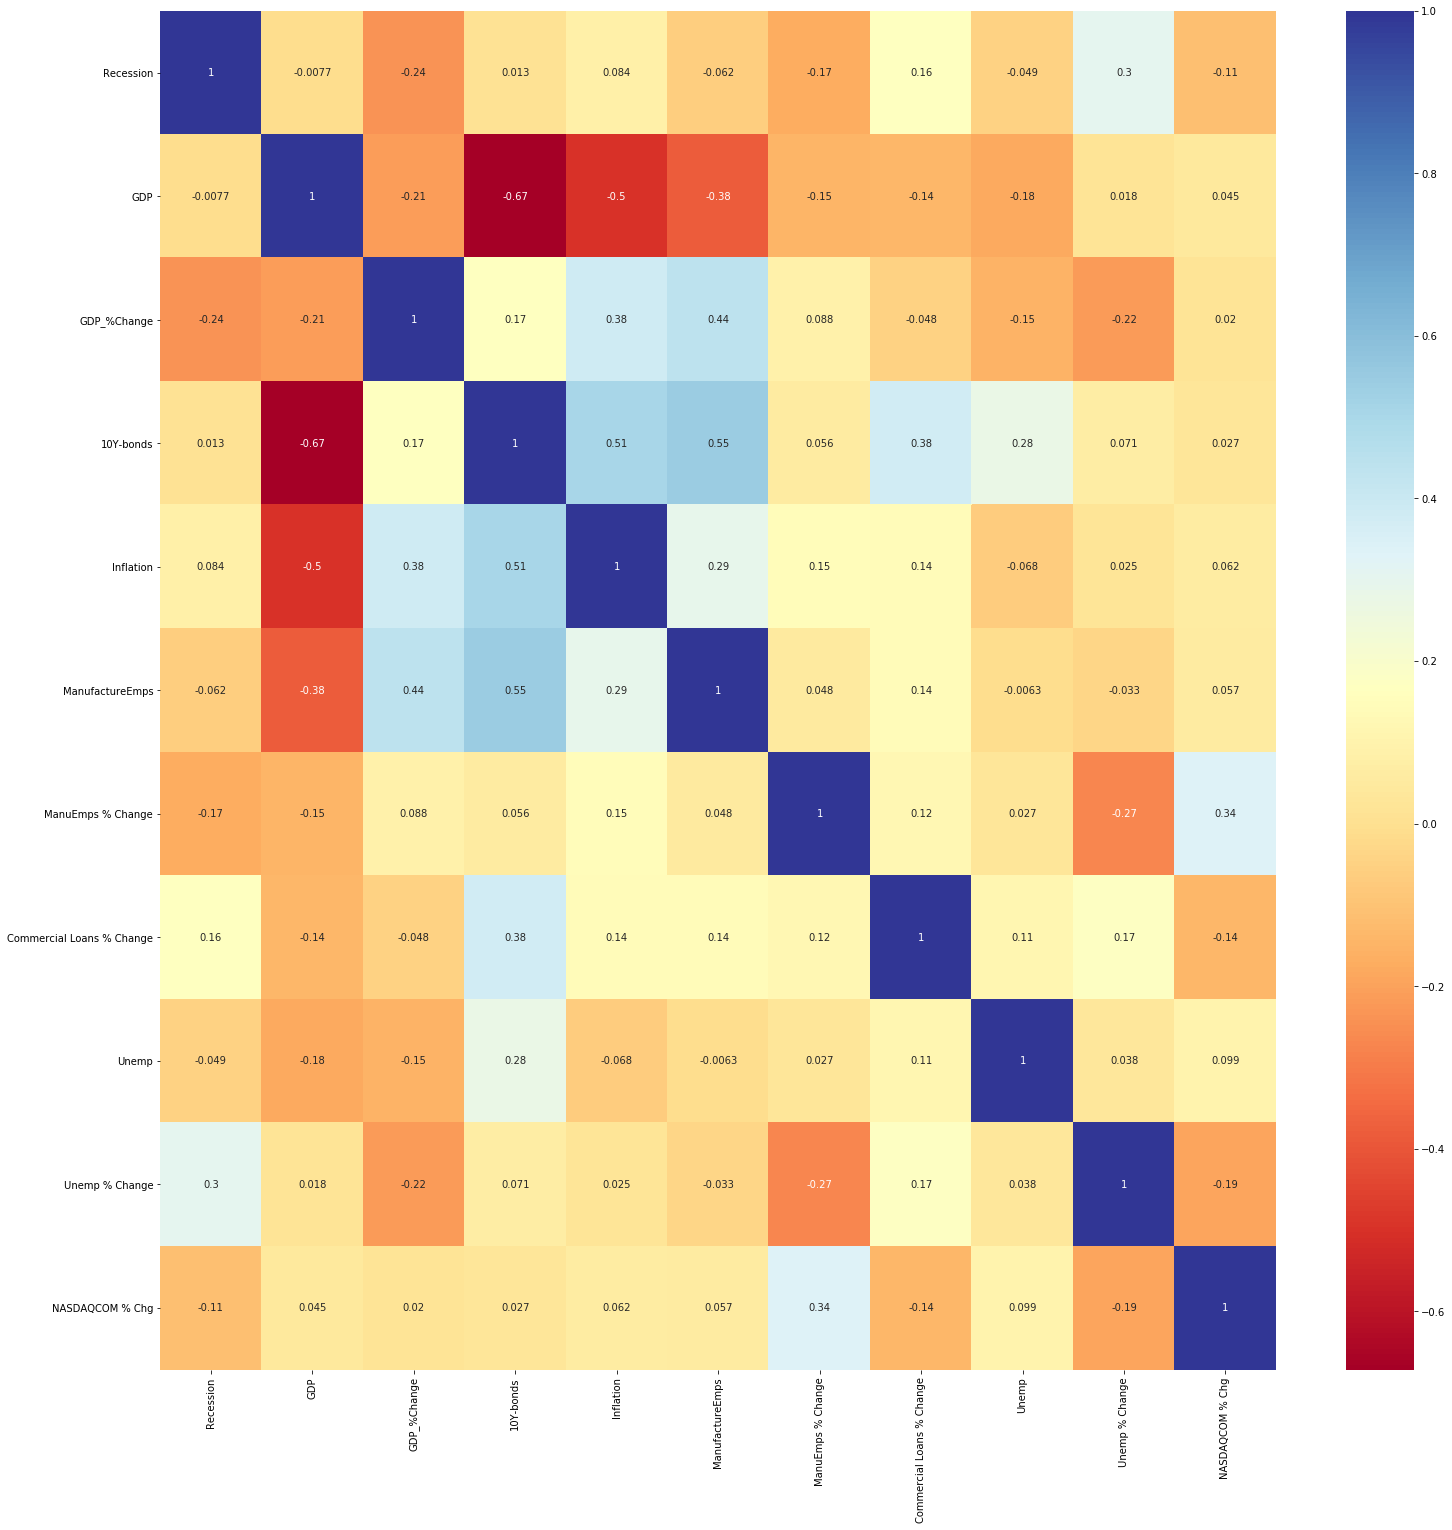

In [55]:
corr = df_merged.corr(method='kendall')
plt.figure(figsize=(25,25))
sns.heatmap(corr, annot=True, cmap="RdYlBu")